# **INTRODUTION**
In the highly competitive telecommunications industry, retaining customers is as critical as acquiring new ones. Customer churn, defined as the phenomenon where customers stop using a company's products or services, directly impacts revenue and profitability. Identifying potential churners allows companies to take proactive steps to retain these customers, thereby enhancing customer satisfaction and loyalty. This project aims to leverage machine learning techniques to predict customer churn based on historical data.

# **PROBLEM STATEMENT**
Telecommunication companies face significant challenges in predicting which customers are likely to churn. Without an accurate prediction mechanism, businesses struggle to allocate resources efficiently for retention strategies. Existing methods often lack precision and fail to consider the complex interplay of multiple factors contributing to churn. This project seeks to address the following key question:

How can customer data be utilized effectively to predict churn and reduce its impact on the business?

# **OBJECTIVE**
 The primary objective of this project is to develop a robust machine learning model for predicting customer churn by leveraging historical data. This involves exploring and analyzing the dataset to identify key factors contributing to churn, preprocessing the data to address missing values, inconsistencies, and outliers, and building and evaluating predictive models such as Logistic Regression, Decision Trees, and Random Forests. Additionally, the project aims to generate actionable insights and recommendations to help the company implement effective strategies to minimize churn and enhance customer retention.

# DATAOVERVIEW
The Telco Customer Churn dataset contains customer data for a telecom company, including demographics, services used, account details, and churn status. It consists of rows representing customers and columns with attributes like gender, tenure, monthly charges, and contract type, combining numerical, categorical, and binary data. Initial checks typically reveal whether the dataset has missing or duplicate values and confirm its structure and size. If the data is clean, it’s ready for analysis to identify churn patterns and build predictive models.

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [96]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# FEATURES
gender: Gender of the customer (Male or Female).
SeniorCitizen: Indicates if the customer is a senior citizen (1 for Yes, 0 for No).
Partner: Whether the customer has a partner (Yes or No).
Dependents: Whether the customer has dependents (Yes or No).
tenure: Number of months the customer has been with the company.
PhoneService: Whether the customer has phone service (Yes or No).
MultipleLines: Whether the customer has multiple lines (Yes, No, or No phone service).
InternetService: Type of internet service (DSL, Fiber optic, or No).
OnlineSecurity: Whether the customer has online security (Yes, No, or No internet service).
OnlineBackup: Whether the customer has online backup (Yes, No, or No internet service).
DeviceProtection: Whether the customer has device protection (Yes, No, or No internet service).
TechSupport: Whether the customer has tech support (Yes, No, or No internet service).
StreamingTV: Whether the customer streams TV (Yes, No, or No internet service).
StreamingMovies: Whether the customer streams movies (Yes, No, or No internet service).
Contract: Type of contract (Month-to-month, One year, or Two year).
PaperlessBilling: Whether the customer has paperless billing (Yes or No).
PaymentMethod: Payment method (Electronic check, Mailed check, Bank transfer (automatic), or Credit card (automatic)).
MonthlyCharges: The amount charged to the customer monthly.
TotalCharges: The total amount charged to the customer.
Churn: Whether the customer churned (Yes or No).

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [99]:
df.duplicated().sum()

0

In [100]:
df.shape

(7043, 21)

# DATA CLEANING
Data cleaning is the process of preparing a dataset for analysis by handling missing values, correcting data types, removing duplicates, addressing outliers, and standardizing data. It involves detecting and imputing missing values using strategies like filling numerical columns with the mean or median and replacing categorical nulls with the mode. Data types are corrected to ensure consistency (e.g., converting strings to numeric), and irrelevant or redundant columns, such as unique identifiers, are removed. Duplicates are identified and dropped to avoid skewed analysis, while outliers are managed using statistical methods. Categorical variables are encoded into numeric formats, numerical data is normalized or scaled, and inconsistencies like typos or varying formats are corrected. Finally, the cleaned dataset is validated to ensure it's complete, consistent, and ready for analysis or modeling.

In [101]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [102]:
df.drop("customerID",axis=1,inplace=True)

# VISUALISATION

The visualizations include a bar plot (sns.countplot) showing the distribution of churned vs. non-churned customers, highlighting any class imbalance in the Churn column, and a histogram (sns.histplot), which similarly displays the frequency of churn categories but is less suited for categorical data. Additionally, a grid of histograms (df.hist) provides an overview of the distributions of all numerical columns, such as tenure, MonthlyCharges, and TotalCharges, helping to identify patterns, skewness, and outliers in the data. Together, these plots offer insights into the dataset's structure and key variables.

<Axes: xlabel='Churn', ylabel='count'>

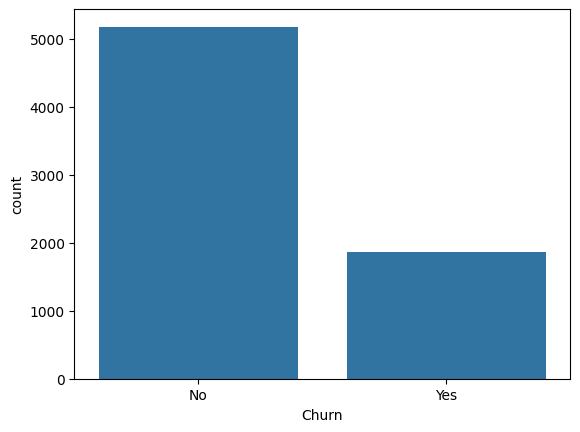

In [103]:
sns.countplot(x="Churn",data=df)

<Axes: xlabel='Churn', ylabel='Count'>

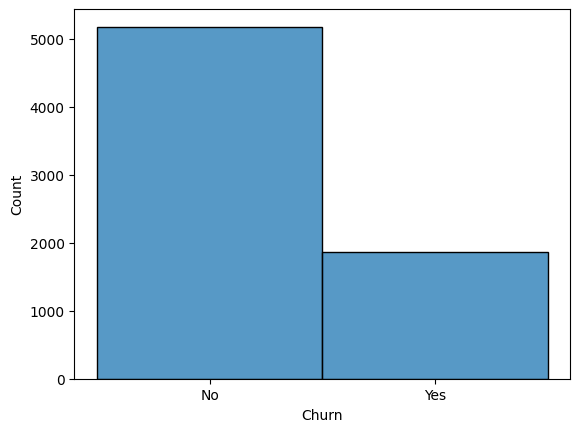

In [104]:
sns.histplot(df["Churn"])

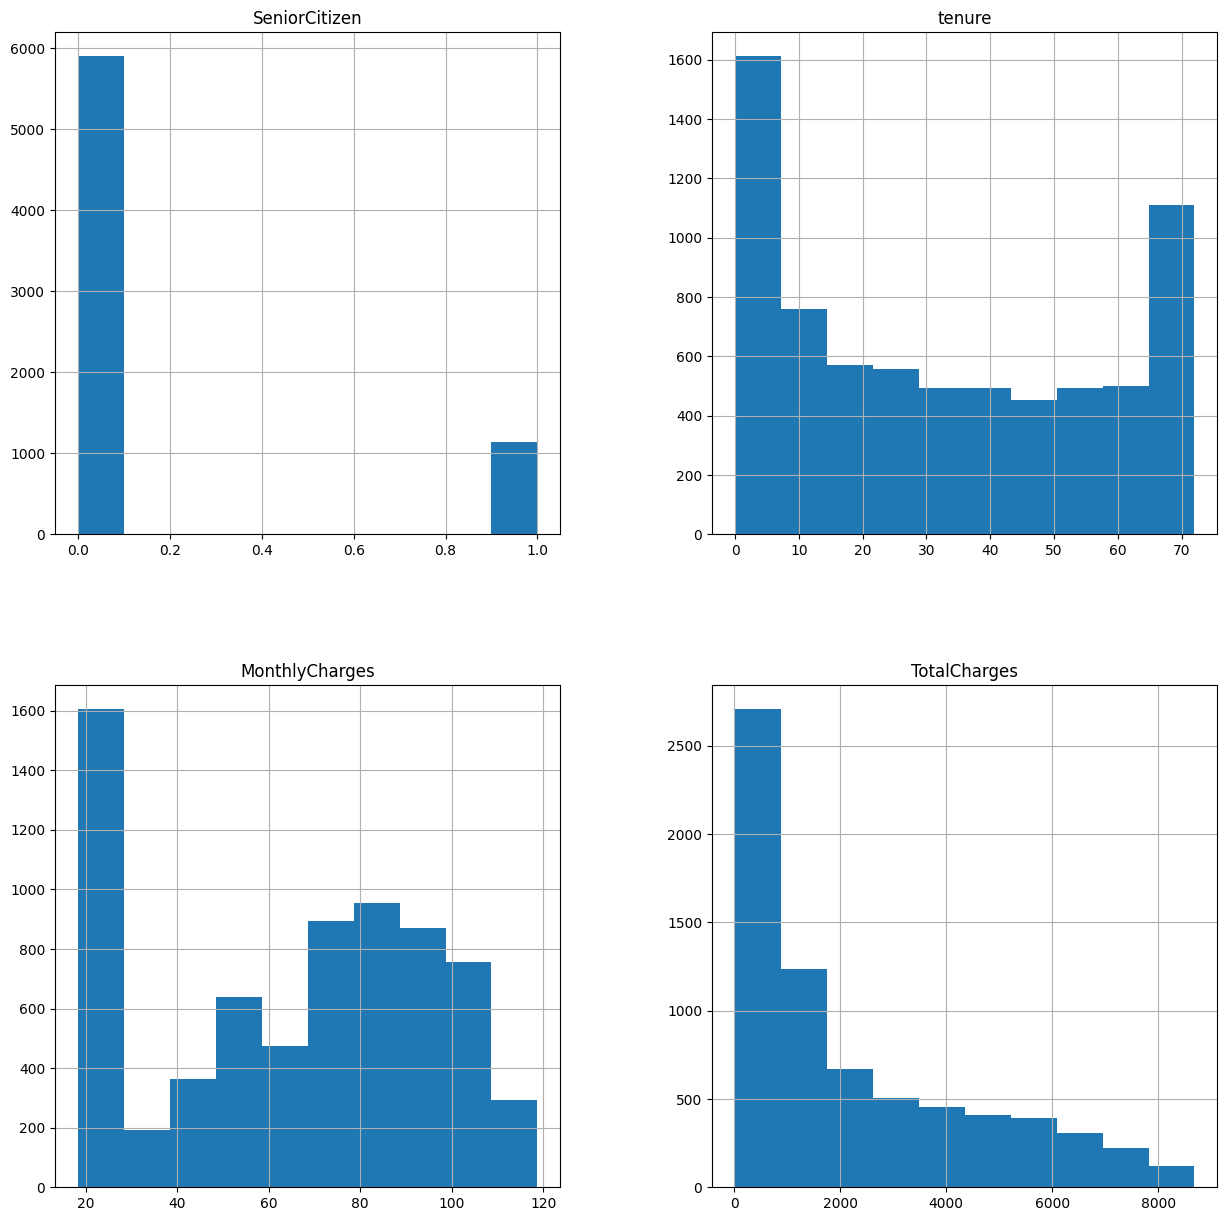

In [105]:
df.hist(figsize=(15,15))
plt.show()

# DATA ENCORDING
The code uses LabelEncoder to convert categorical variables into numerical values, transforming columns such as Churn, gender, Partner, InternetService, and PaymentMethod into integer representations. For example, binary categories like Churn ("Yes"/"No") are encoded as 1 and 0, while multi-class variables like InternetService are mapped to integers representing each unique category. This step ensures all categorical columns are numeric, making the dataset compatible with machine learning algorithms. While label encoding is quick and efficient, it assumes ordinal relationships, which may not suit non-ordinal data; one-hot encoding might be preferred in such cases. After encoding, the dataset is ready for further preprocessing or modeling.

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

# **MAPPING**
The code uses a custom mapping (`ordinal_mapping`) to convert the `Contract` column, which contains categorical values like "Month-to-month", "One year", and "Two year", into ordinal numerical values (1, 2, and 3, respectively). This transformation is applied using the `map()` function, which ensures that the contract type is represented numerically while preserving the ordinal relationship, where "Month-to-month" is considered the lowest value and "Two year" the highest. This is particularly useful for machine learning models that can benefit from the ordinal nature of the data.

In [107]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [108]:
ordinal_mapping = {'Month-to-month':1, 'One year':2, 'Two year':3}
df["Contract"] = df["Contract"].map(ordinal_mapping)

<Axes: xlabel='count', ylabel='Churn'>

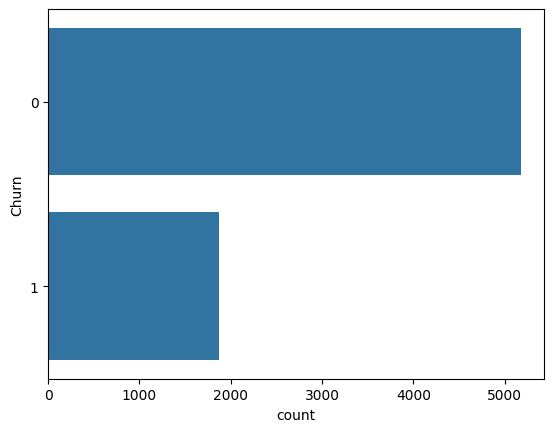

In [109]:
sns.countplot(y="Churn",data=df)

In [110]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,1,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,2,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,1,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,2,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,2,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,2,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,1,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,1,1,3,74.40,306.60,1


# OVER SAMPLING
The code applies oversampling techniques to address class imbalance in the `Churn` column using either `RandomOverSampler` or `SMOTE` from the `imblearn` library. It separates the features (`x`) and target (`y`), then applies the oversampling method to generate a balanced dataset by increasing the number of minority class instances. In this case, `SMOTE` (Synthetic Minority Over-sampling Technique) is used to create synthetic samples for the minority class. After resampling, the data is combined back into a DataFrame, and a `countplot` is generated to visualize the new distribution of the `Churn` target variable, ensuring a more balanced representation of churned and non-churned customers for further analysis or modeling.

In [111]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [112]:
#assuming 'df' is your DataFrame with 'Churn' as the target variable
x=df.drop('Churn',axis=1)
y=df['Churn']


#screatan oversampler object (choose either randomoversampler or SMOTE)
#Uncomment the one you want to use
#ros=randomOversampler() for random Oversampling
ros=SMOTE()#for sythetic minority

#Apply the oversampler to the data
x_resampled,y_resampled=ros.fit_resample(x,y)

x_resampled=pd.DataFrame(x_resampled,columns=x.columns)
y_resampled=pd.Series(y_resampled,name='Churn')

df=pd.concat([x_resampled,y_resampled],axis=1)

<Axes: xlabel='count', ylabel='Churn'>

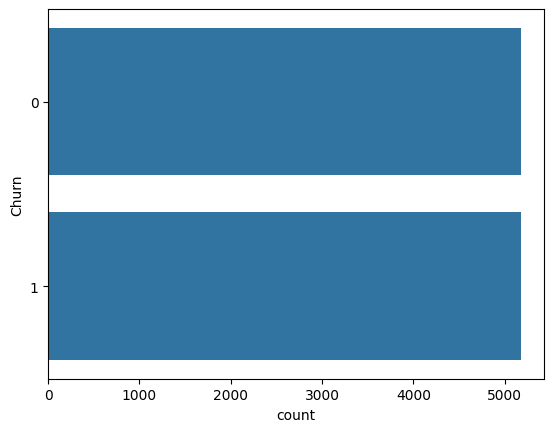

In [113]:
sns.countplot(y="Churn", data=df)


# **CORRELATION**
The code computes the correlation matrix of the DataFrame using `df.corr()` and visualizes it as a heatmap with `sns.heatmap` to highlight relationships between numerical features, with values annotated and a `coolwarm` color map. It then calculates the correlation between all features and the `Churn` target variable, sorting them in descending order to identify the most influential features. Following this, several columns, including `SeniorCitizen`, `MultipleLines`, `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`, `gender`, `PaymentMethod`, and `PaperlessBilling`, are dropped based on the correlation analysis, presumably to reduce noise or focus on the most impactful features for modeling. The correlation with `Churn` is recalculated to reflect the updated dataset.

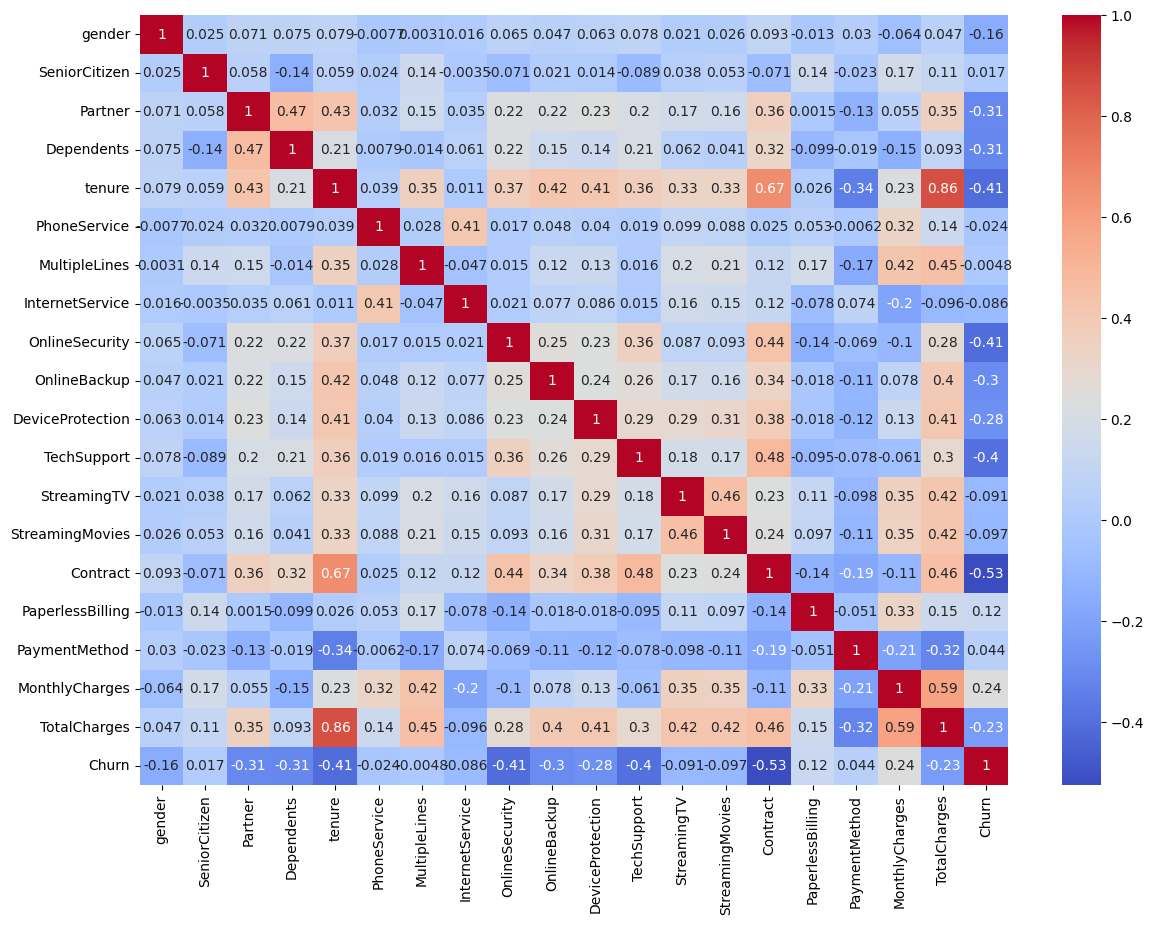

In [114]:
corr_matrix=df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [115]:
cor=df.corr()['Churn'].sort_values(ascending=False)
cor

,Churn
Churn,1.000000
MonthlyCharges,0.238992
PaperlessBilling,0.124497
PaymentMethod,0.044222
SeniorCitizen,0.016715
MultipleLines,-0.004791
PhoneService,-0.024132
InternetService,-0.086251
StreamingTV,-0.091202
StreamingMovies,-0.096861


In [116]:
df.drop(["SeniorCitizen", "MultipleLines", "PhoneService", "InternetService", "StreamingTV", "StreamingMovies","gender","PaymentMethod","PaperlessBilling"], axis=1,inplace=True)


In [117]:
cor=df.corr()['Churn'].sort_values(ascending=False)
cor

,Churn
Churn,1.000000
MonthlyCharges,0.238992
TotalCharges,-0.229815
DeviceProtection,-0.275687
OnlineBackup,-0.297957
Partner,-0.309272
Dependents,-0.311329
TechSupport,-0.399711
OnlineSecurity,-0.409242
tenure,-0.412056


# SKEWNESS HANDLING
The code applies a log transformation to the `TotalCharges`, `MonthlyCharges`, and `tenure` columns to handle skewness in the data, with `np.log` being used after adding 1 to avoid taking the logarithm of zero. A series of histograms with kernel density estimates (KDE) are then plotted for each of the log-transformed columns using `sns.histplot`, displayed in a subplot layout. The plot is scaled with a large figure size to accommodate all three features side by side. This transformation helps normalize the data distribution and reduce skewness, making it more suitable for modeling.

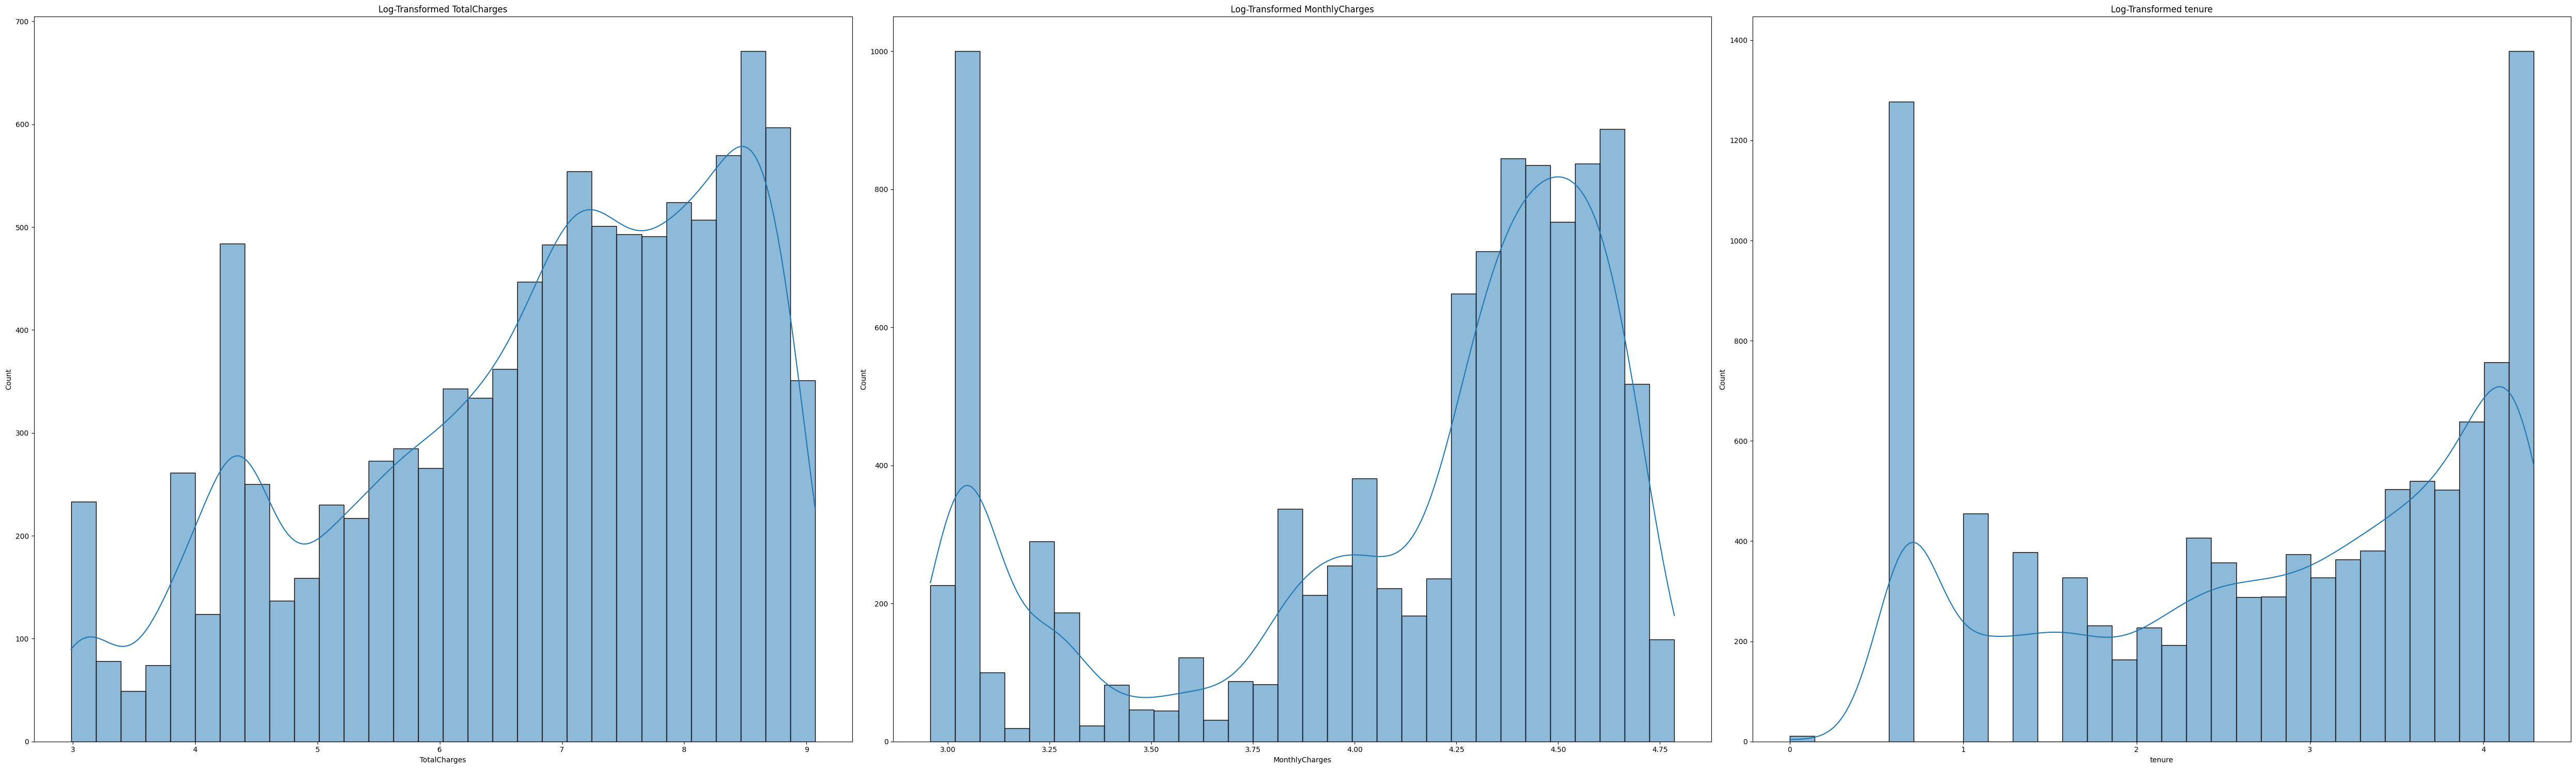

In [118]:
#To handle skewness
import numpy as np

# Correct column names and using them in a list
columns_to_transform = ['TotalCharges', 'MonthlyCharges', 'tenure']

# Apply log transformation to the selected columns
log_data = np.log(df[columns_to_transform] + 1)  # Adding 1 to avoid log(0)


# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

In [119]:
df.shape

(10348, 11)

# OUTLIER HANDLING
The code visualizes the distribution of all columns in the dataset using a horizontal boxplot with `sns.boxplot`, which helps identify potential outliers across numerical features. Then, it calculates the first (Q1), second (Q2, the median), and third (Q3) quartiles for the entire dataset, along with the Interquartile Range (IQR), which measures the spread between Q3 and Q1. The function `remove_outliers_iqr` is defined to detect and remove outliers from a specified column based on the IQR method, where values outside the bounds of `Q1 - 1.5*IQR` and `Q3 + 1.5*IQR` are considered outliers. Finally, the function is applied to the `TotalCharges` column to create a new DataFrame (`df_no_outliers`) with the outliers removed, ensuring cleaner data for further analysis.



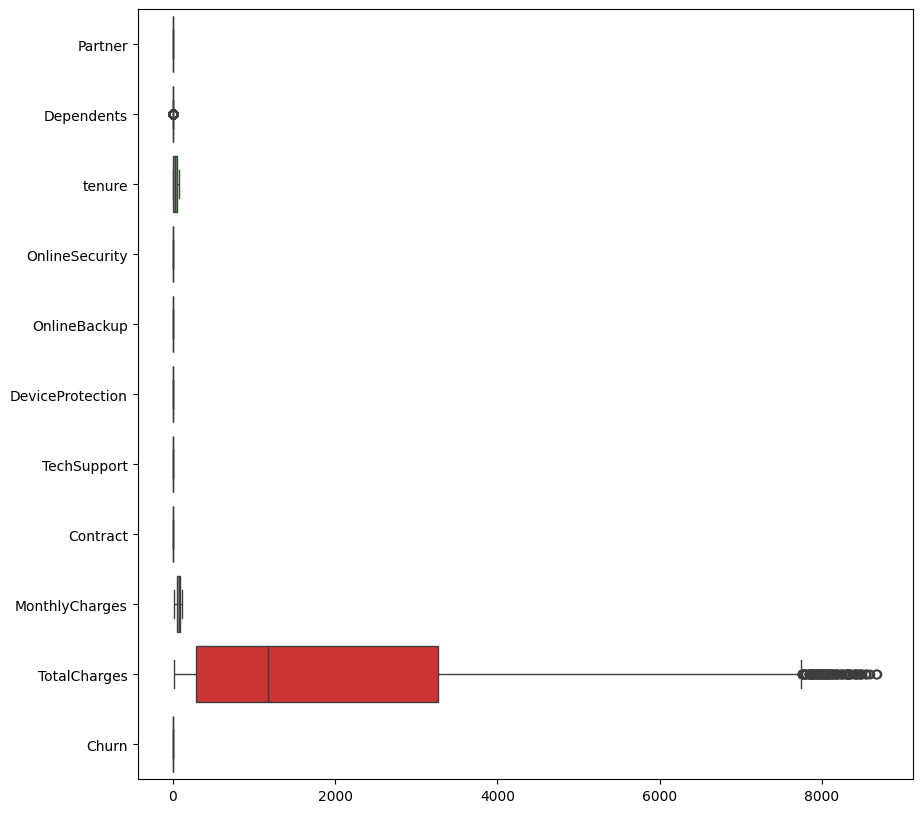

In [120]:
plt.figure(figsize=(10,10))
sns.boxplot(df,orient='h',palette='Set1')
plt.show()

In [121]:
import numpy as np

In [122]:
Q1=np.quantile(df,0.25)
Q2=np.quantile(df,0.50)
Q3=np.quantile(df,0.75)
Q1,Q2,Q3
IQR=Q3-Q1
IQR

5.0

In [123]:
def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers from the DataFrame
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


df_no_outliers = remove_outliers_iqr(df,'TotalCharges')

# MODEL TRAINING AND EVALUATION
The code prepares the dataset for training by selecting independent variables (`Partner`, `Dependents`, `tenure`, etc.) and the dependent variable (`Churn`). It then applies standard scaling to the independent features using `StandardScaler`, ensuring the data is centered and scaled for machine learning models. After fitting the scaler, the features are transformed, and the dataset is split into training and testing sets with an 80-20 split using `train_test_split`. This prepares the data for training models like Logistic Regression or Random Forest by ensuring that the features are on a consistent scale, which is important for model performance, especially for distance-based algorithms.

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [125]:
independet_feature = ['Partner', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'MonthlyCharges',
       'TotalCharges']
dependet_feature = ['Churn']
x = df[independet_feature]
y = df[dependet_feature]

In [126]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler
# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(x)

# Transform the data
X_scaled = scaler.transform(x)
# X_test_scaled = scaler.transform(X_test)

In [127]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## GradientBoostingClassifier

In [128]:
# from sklearn.ensemble import  GradientBoostingClassifier
# # Create a GradientBoostingClassifiert Classifier object
# model_1 = GradientBoostingClassifier()  # You can adjust hyperparameters

# # Train the model
# model_1.fit(x_train, y_train)

# # Make predictions on the test set
# y_pred = model_1.predict(x_test)

# # Evaluate the model's accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# cm = confusion_matrix(y_test, y_pred)
# cm

## XGBClassifier

In [129]:
# import xgboost as xgb

# # Create an XGBoost Classifier object
# model_2 = xgb.XGBClassifier()  # You can adjust hyperparameters

# # Train the model
# model_2.fit(x_train, y_train)

# # Make predictions on the test set
# y_pred = model_2.predict(x_test)

# # Evaluate the model's accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# cm = confusion_matrix(y_test, y_pred)
# cm

## LogisticRegression

In [130]:
# from sklearn.linear_model import LogisticRegression
# # Create an LogisticRegression Classifier object
# model_4 =LogisticRegression()  # You can adjust hyperparameters

# # Train the model
# model_4.fit(x_train, y_train)

# # Make predictions on the test set
# y_pred = model_4.predict(x_test)

# # Evaluate the model's accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# cm = confusion_matrix(y_test, y_pred)
# cm

## KNeighborsClassifie

In [131]:
# from sklearn.neighbors import KNeighborsClassifier
# # Create an KNeighborsClassifier Classifier object
# model_5 =KNeighborsClassifier()  # You can adjust hyperparameters

# # Train the model
# model_5.fit(x_train, y_train)

# # Make predictions on the test set
# y_pred = model_5.predict(x_test)

# # Evaluate the model's accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# cm = confusion_matrix(y_test, y_pred)
# cm

## RandomForestClassifier

In [132]:
from sklearn.ensemble import RandomForestClassifier
# Create an RandomForestClassifier Classifier object
model_3 = RandomForestClassifier()  # You can adjust hyperparameters

# Train the model
model_3.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_3.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8396135265700483


array([[859, 162],
       [170, 879]])

In [133]:
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score,confusion_matrix
print("accuracy_score",accuracy_score(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred, average="weighted"))

print('Recall:', recall_score(y_test, y_pred, average="weighted"))

print('F1 Score:', f1_score(y_test, y_pred, average="weighted"))

accuracy_score 0.8396135265700483
Precision: 0.8396505868374005
Recall: 0.8396135265700483
F1 Score: 0.8396195160287363


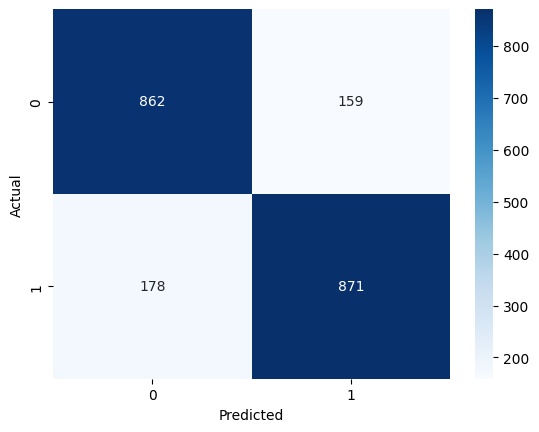

In [134]:
from sklearn.metrics import confusion_matrix
import numpy as np
conf_matrix=np.array([[862, 159],
       [178, 871]])
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [135]:
df

,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,2,0,0,1,29.850000,29.850000,0
1,0,0,34,2,0,2,0,2,56.950000,1889.500000,0
2,0,0,2,2,2,0,0,1,53.850000,108.150000,1
3,0,0,45,2,0,2,2,2,42.300000,1840.750000,0
4,0,0,2,0,0,0,0,1,70.700000,151.650000,1
...,...,...,...,...,...,...,...,...,...,...,...
10343,0,0,25,1,1,0,0,1,101.053026,2658.829620,1
10344,0,0,48,0,2,1,0,1,103.614210,5036.538305,1
10345,0,0,16,0,0,0,0,1,86.048878,1451.100935,1
10346,0,0,44,0,2,0,0,1,101.824379,4745.157715,1


# TARGET PREDICTION
The code prompts the user to input values for various features such as `Partner`, `Dependents`, `tenure`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `Contract`, `MonthlyCharges`, and `TotalCharges`. These inputs are stored in a NumPy array, which is then used as input to a pre-trained model (referred to as `model_3`). The model predicts the `Churn` value (whether the customer will churn or not) based on the provided feature values, and the predicted result is printed to the console as `predicted price`. The process allows the user to interactively obtain a prediction using the trained model.

In [136]:
Partner=int(input('enter Partner:'))
Dependents=int(input('enter Dependents:'))
tenure=int(input('enter tenure:'))
OnlineSecurity=int(input('enter the OnlineSecurity:'))
OnlineBackup=int(input('enter the OnlineBackup:'))
DeviceProtection=int(input('enter the DeviceProtection:'))
TechSupport=int(input('enter the TechSupport'))
Contract=int(input('enter the Contract'))
MonthlyCharges=float(input('enter the MonthlyCharges'))
TotalCharges=float(input('enter the TotalCharges'))
user_input=np.array([Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges])
Churn= model_3.predict([user_input])
print('predicted price:',Churn)

# **conclusion**
In conclusion, this project effectively demonstrates the process of predicting customer churn in the telecommunications industry using machine learning techniques. By utilizing a comprehensive dataset containing various customer features, the project addresses key challenges such as class imbalance and data preprocessing. Through techniques like oversampling, encoding categorical variables, and handling skewness and outliers, the data is prepared for modeling. Various machine learning models, including Random Forest Classifier, are trained and evaluated, with performance metrics such as accuracy, precision, recall, and F1 score providing insights into the model’s effectiveness. The final model enables the prediction of customer churn, offering valuable insights for businesses to take proactive steps in retaining customers and improving overall satisfaction.